## PREDICTING HOUSE RENT PRICE
based on location, bedroom, bathroom, and floor area

In [67]:
## IMPORT BASIC

import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import warnings
warnings.filterwarnings('ignore') #IGNORE WARNINGS

### DATA EXPLORATION

In [68]:
df = pd.read_csv('house_rental.csv');

In [69]:
df

,Unnamed: 0,title,Municipality,Province,price,agent,agent_membership,agent_verified,date,vendor,bedroom,bath,floor_area
0,0,"Dormitory Spaces for Rent in Santo Tomas, Bata...",Santa Anastacia,Santo Tomas,12500,Oasis FPIP,2019,verified,03 19 2023,lamudi,1,1,15
1,1,Rush For Lease: 35-Door Staff House Near Circu...,Olympia,Makati,54500,Fern Marie Badong,2017,verified,03 19 2023,lamudi,35,35,1100
2,2,Room for Rent in Greenpark Mangahan Pasig near...,Green Park,Pasig,8500,Ed Mallari,2014,verified,03 19 2023,lamudi,1,1,20
3,3,Discounted Price! For Rent Studio Type Apartme...,Maypajo,Caloocan,12000,JESSA MARTIN,2022,not verified,03 19 2023,lamudi,1,1,26
4,4,"Apartment Building For Rent Located in Molino,...",Molino VII,Bacoor,12500,Clement Dizon,2016,verified,03 19 2023,lamudi,40,40,1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13850,15190,"Apartment for rent near CDU, ayala and SM",Subangdaku,Mandaue,10500,Danilla Velasquez,2012,verified,03 24 2023,my property,1,1,0
13851,15193,Apartment Room For Rent at San Francisco Subd....,Almanza Uno,Las Piñas,4500,Obet Guzman,2019,verified,03 24 2023,my property,1,0,18
13852,15194,Fully Furnished Apartment for rent with 3 bedr...,Cuayan,Angeles,45000,Marvin Manalo,2022,verified,03 24 2023,my property,3,3,120
13853,15195,"Apartment for RENT Upper Cubi, Subic Bay Freep...",Asinan,Olongapo,54500,Broker Janice Stuka,2023,verified,03 24 2023,my property,3,3,217


In [70]:
#Replacing the 'contact agent for price' into null values
def change_price(col):
    price_change = 'Contact agent for price';
    
    df[col][df[col] == price_change] = None;

In [71]:
change_price('price')

In [72]:
df['price']

0        12500
1        54500
2         8500
3        12000
4        12500
         ...  
13850    10500
13851     4500
13852    45000
13853    54500
13854    12500
Name: price, Length: 13855, dtype: int64

In [73]:
df.drop(['Unnamed: 0','agent', 'title'], axis = 1, inplace=True) # dropping index axis


In [74]:
df.duplicated().sum()

978

In [75]:
df = df.drop_duplicates()

In [76]:
df.shape

(12877, 10)

In [77]:
df.isna().sum()

Municipality           0
Province            1988
price                  0
agent_membership       0
agent_verified         0
date                   0
vendor                 0
bedroom                0
bath                   0
floor_area             0
dtype: int64

In [78]:
#Change Datatypes into string values
df = df.astype('string')

In [79]:
df.dtypes

Municipality        string
Province            string
price               string
agent_membership    string
agent_verified      string
date                string
vendor              string
bedroom             string
bath                string
floor_area          string
dtype: object

In [80]:
#Parse the price into float data type
df['price'] = df['price'].astype(float)

In [81]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [82]:
df.dtypes

Municipality                string
Province                    string
price                      float64
agent_membership            string
agent_verified              string
date                datetime64[ns]
vendor                      string
bedroom                     string
bath                        string
floor_area                  string
dtype: object

<AxesSubplot:xlabel='price'>

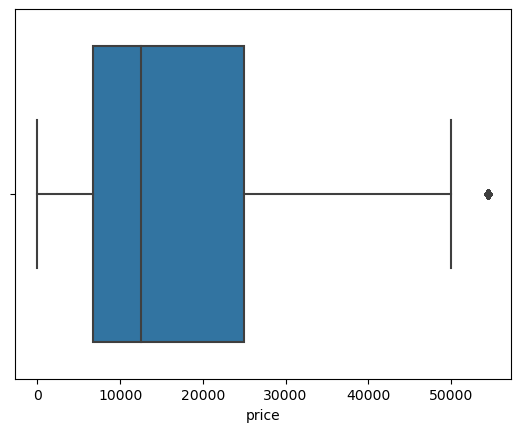

In [83]:
sns.boxplot(df['price'])

In [84]:
def remove_outliers(col):
    q1 = df[col].quantile(0.25);
    q3 = df[col].quantile(0.75);
    iqr = q3 - q1;
    
    max_ = q3 + (1.5*iqr);
    min_ = q1 - (1.5*iqr);
    
    df[col][df[col] < min_] = min_;
    df[col][df[col] > max_] = max_;

In [85]:
remove_outliers('price')

In [86]:
for col in df.columns:
    if (col != 'price' and df[col].dtypes == 'float64'):
        plt.figure()
        sns.boxplot(df[col])

In [87]:
for col in df.columns:
    if (col != 'price' and df[col].dtypes == 'float64'):
        remove_outliers(col)

In [88]:
for col in df.columns:
    if (col != 'price' and df[col].dtypes == 'float64'):
        plt.figure()
        sns.boxplot(df[col])

In [89]:
df['price'].fillna(df['price'].median(),inplace = True);

In [90]:
df

,Municipality,Province,price,agent_membership,agent_verified,date,vendor,bedroom,bath,floor_area
0,Santa Anastacia,Santo Tomas,12500.0,2019,verified,2023-03-19,lamudi,1,1,15
1,Olympia,Makati,52450.0,2017,verified,2023-03-19,lamudi,35,35,1100
2,Green Park,Pasig,8500.0,2014,verified,2023-03-19,lamudi,1,1,20
3,Maypajo,Caloocan,12000.0,2022,not verified,2023-03-19,lamudi,1,1,26
4,Molino VII,Bacoor,12500.0,2016,verified,2023-03-19,lamudi,40,40,1700
...,...,...,...,...,...,...,...,...,...,...
13849,Capitol Site,Cebu,25000.0,2016,verified,2023-03-24,my property,3,2,100
13850,Subangdaku,Mandaue,10500.0,2012,verified,2023-03-24,my property,1,1,0
13851,Almanza Uno,Las Piñas,4500.0,2019,verified,2023-03-24,my property,1,0,18
13852,Cuayan,Angeles,45000.0,2022,verified,2023-03-24,my property,3,3,120


In [91]:
df.dtypes

Municipality                string
Province                    string
price                      float64
agent_membership            string
agent_verified              string
date                datetime64[ns]
vendor                      string
bedroom                     string
bath                        string
floor_area                  string
dtype: object

### DATA CLEANING

In [92]:
# dropping non-needed columns
df.drop(['Municipality','agent_membership','agent_verified','date','vendor'],axis = 1, inplace = True)

In [93]:
#parsing data to appropriate values
df['bedroom'] = df['bedroom'].astype(int)
df['floor_area'] = df['floor_area'].astype(float)
df['bath'] = df['bath'].astype(int)

In [94]:
df.dtypes

Province       string
price         float64
bedroom         int32
bath            int32
floor_area    float64
dtype: object

In [95]:
df.isna().sum()

Province      1988
price            0
bedroom          0
bath             0
floor_area       0
dtype: int64

In [96]:
# filling null values
df['Province'] = df['Province'].fillna('NA');
df['bedroom'] = df['bedroom'].fillna(0);
df['bath'] = df['bath'].fillna(0);
df['floor_area'] = df['floor_area'].fillna(0);

In [97]:
df.isna().sum()

Province      0
price         0
bedroom       0
bath          0
floor_area    0
dtype: int64

In [98]:

df_copy = df.copy() # preserve data for later

In [99]:
from sklearn.preprocessing import LabelEncoder;

encoder = LabelEncoder();

df['Province'] = encoder.fit_transform(df['Province'])
    

In [100]:
df

,Province,price,bedroom,bath,floor_area
0,106,12500.0,1,1,15.0
1,60,52450.0,35,35,1100.0
2,85,8500.0,1,1,20.0
3,20,12000.0,1,1,26.0
4,6,12500.0,40,40,1700.0
...,...,...,...,...,...
13849,24,25000.0,3,2,100.0
13850,67,10500.0,1,1,0.0
13851,51,4500.0,1,0,18.0
13852,0,45000.0,3,3,120.0


In [101]:
df_copy

,Province,price,bedroom,bath,floor_area
0,Santo Tomas,12500.0,1,1,15.0
1,Makati,52450.0,35,35,1100.0
2,Pasig,8500.0,1,1,20.0
3,Caloocan,12000.0,1,1,26.0
4,Bacoor,12500.0,40,40,1700.0
...,...,...,...,...,...
13849,Cebu,25000.0,3,2,100.0
13850,Mandaue,10500.0,1,1,0.0
13851,Las Piñas,4500.0,1,0,18.0
13852,Angeles,45000.0,3,3,120.0


In [102]:
df.dtypes

Province        int32
price         float64
bedroom         int32
bath            int32
floor_area    float64
dtype: object

In [103]:
from sklearn.preprocessing import MinMaxScaler; 

scaler = MinMaxScaler()
df_scaled = df.copy()

In [141]:
for col in df.columns:
    if (col != 'price'):
        df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1,1))

In [105]:
df_scaled

,Province,price,bedroom,bath,floor_area
0,0.809160,12500.0,0.003205,0.005,0.0015
1,0.458015,52450.0,0.112179,0.175,0.1100
2,0.648855,8500.0,0.003205,0.005,0.0020
3,0.152672,12000.0,0.003205,0.005,0.0026
4,0.045802,12500.0,0.128205,0.200,0.1700
...,...,...,...,...,...
13849,0.183206,25000.0,0.009615,0.010,0.0100
13850,0.511450,10500.0,0.003205,0.005,0.0000
13851,0.389313,4500.0,0.003205,0.000,0.0018
13852,0.000000,45000.0,0.009615,0.015,0.0120


<AxesSubplot:>

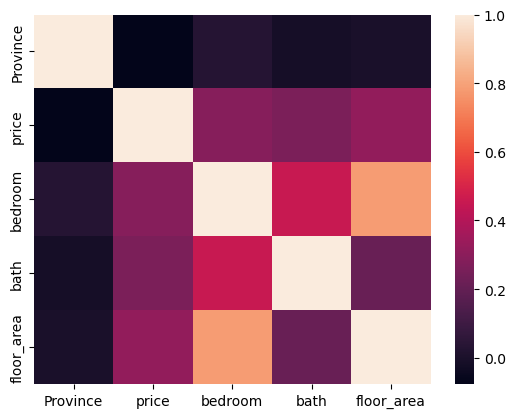

In [106]:
#looking for correlation
sns.heatmap(df.corr())

In [107]:
corr = df.corr();
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False);
corr_df = pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()

In [108]:
corr_df

,,0
bedroom,floor_area,0.784039


In [109]:
df_scaled.columns

Index(['Province', 'price', 'bedroom', 'bath', 'floor_area'], dtype='object')

In [110]:
df_scaled ## final dataset

,Province,price,bedroom,bath,floor_area
0,0.809160,12500.0,0.003205,0.005,0.0015
1,0.458015,52450.0,0.112179,0.175,0.1100
2,0.648855,8500.0,0.003205,0.005,0.0020
3,0.152672,12000.0,0.003205,0.005,0.0026
4,0.045802,12500.0,0.128205,0.200,0.1700
...,...,...,...,...,...
13849,0.183206,25000.0,0.009615,0.010,0.0100
13850,0.511450,10500.0,0.003205,0.005,0.0000
13851,0.389313,4500.0,0.003205,0.000,0.0018
13852,0.000000,45000.0,0.009615,0.015,0.0120


# Modelling

In [164]:
#separating data from the target variable
X = df.drop(['price'],axis=1) #target
y = df['price']

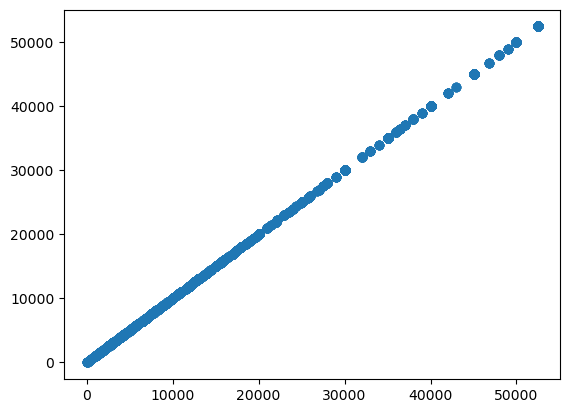

In [165]:
plt.scatter(y,y)

In [166]:
# imports for modelling
from sklearn.model_selection import train_test_split #for splitting

# models
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor;
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge;
from xgboost import XGBRegressor;
from lightgbm import LGBMRegressor;
from sklearn.ensemble import RandomForestRegressor

#for measuring accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [187]:
def evaluate_model(model, X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size = .85);
    
    
    model.fit(X_train, y_train);
    
    y_pred = model.predict(X_test);
    print('r^2 Score: ', r2_score(y_test, y_pred)) # accuracy score
    print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred)); #closer to zero, better
    print('Root Mean Square Eror: ', np.sqrt(mean_squared_error(y_test, y_pred)))  #closer to zero, better
    
    
    print('Accuracy Score: ', cross_val_score(model,X,y,cv = 10).mean())

    plt.scatter(y_train, model.predict(X_train), color='g')
    plt.plot(y_pred, y_pred)
    plt.show()

BayesianRidge()
r^2 Score:  0.13176905778147519
Mean Absolute Error:  11761.137312817436
Root Mean Square Eror:  15038.512304953587
Accuracy Score:  0.13838053092278416


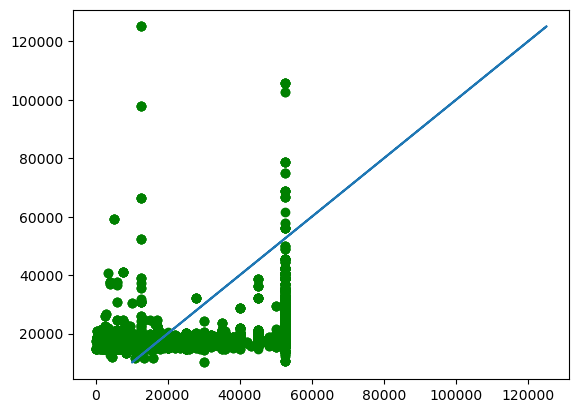

SGDRegressor()
r^2 Score:  -2.4177097610410398e+19
Mean Absolute Error:  21246721110511.082
Root Mean Square Eror:  79357746687759.27
Accuracy Score:  -8.94739154749823e+20


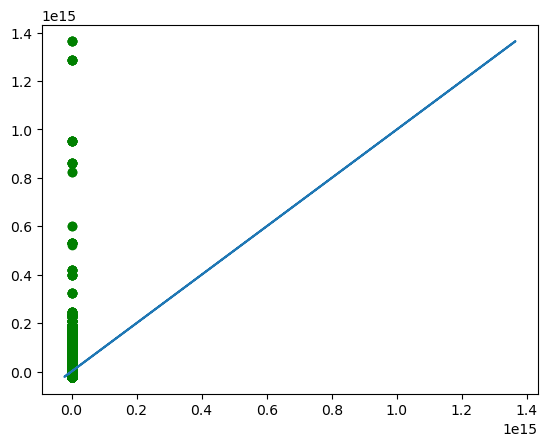

ElasticNet()
r^2 Score:  0.13178506059761497
Mean Absolute Error:  11762.372278807368
Root Mean Square Eror:  15038.37371299339
Accuracy Score:  0.13841793311858544


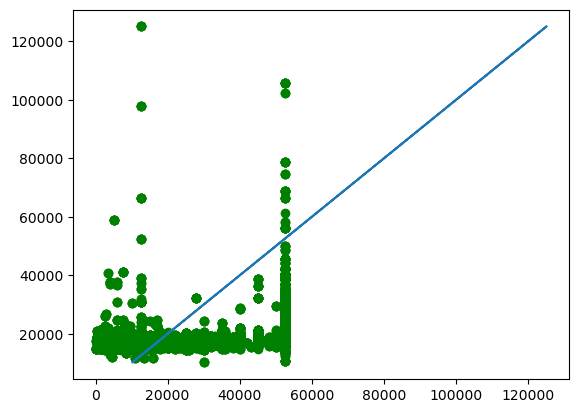

GradientBoostingRegressor()
r^2 Score:  0.6560643506227615
Mean Absolute Error:  6786.372328230552
Root Mean Square Eror:  9465.113857642804
Accuracy Score:  0.6419004833913572


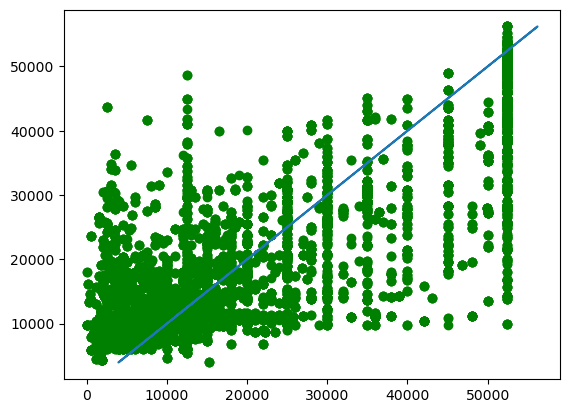

LinearRegression()
r^2 Score:  0.1317292482329938
Mean Absolute Error:  11758.426969061744
Root Mean Square Eror:  15038.857068940453
Accuracy Score:  0.1383733200269363


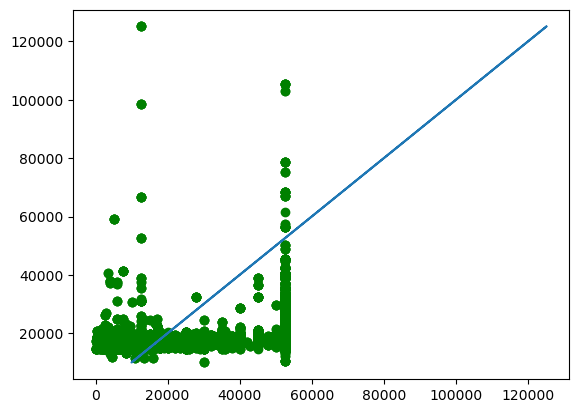

KernelRidge()
r^2 Score:  -0.2641005702636616
Mean Absolute Error:  13291.624991099377
Root Mean Square Eror:  18145.881043047175
Accuracy Score:  -0.20090305481964235


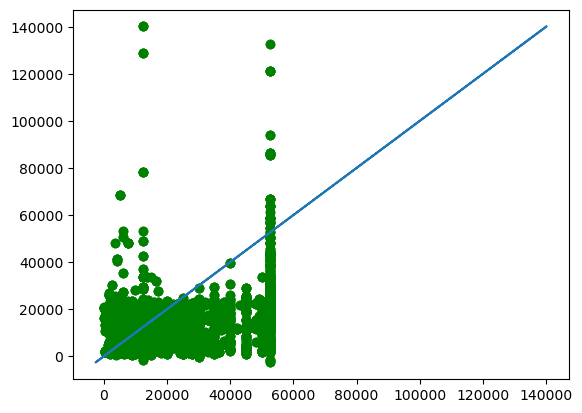

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
r^2 Score:  0.8709569149312721
Mean Absolute Error:  3834.078658441579
Root Mean Square Eror:  5797.6849861571645
Accuracy Score:  0.8749304045021121


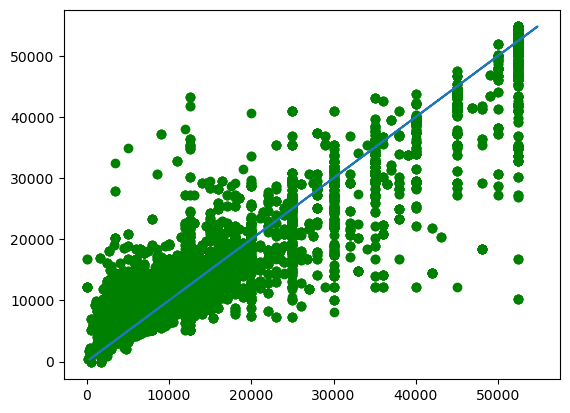

LGBMRegressor()
r^2 Score:  0.7788517414000827
Mean Absolute Error:  5393.683353295282
Root Mean Square Eror:  7589.776860729651
Accuracy Score:  0.7837258357275758


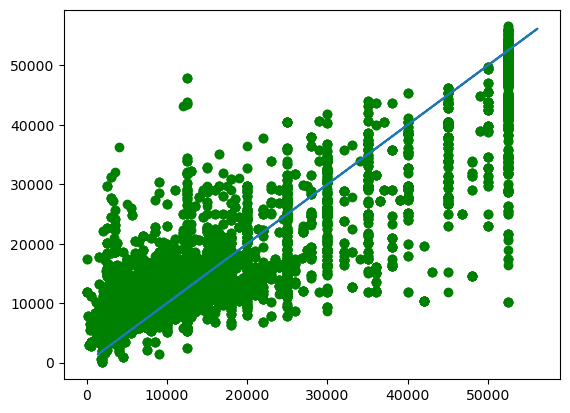

RandomForestRegressor()
r^2 Score:  0.9002716986063977
Mean Absolute Error:  2613.8769453775617
Root Mean Square Eror:  5096.786677778554
Accuracy Score:  0.9123827153855644


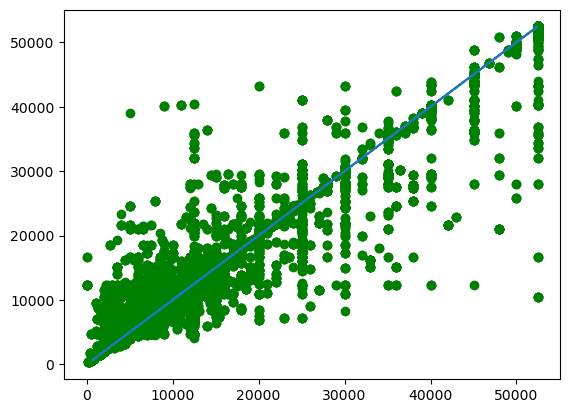

In [188]:
models = [BayesianRidge(),SGDRegressor(),ElasticNet(),GradientBoostingRegressor()
          ,LinearRegression(),KernelRidge(),XGBRegressor(),LGBMRegressor(), RandomForestRegressor()]
for model in models:
    print(model)
    evaluate_model(model, X,y) #fitting and evaluating model

### CHOSEN MODEL : <b>Random Forest Regressor</b>
Accuracy Score : 89.9 (90) % <br>
Cross Validation Score (10) :  91.206 %
 

### FEATURE ENGINEERING TECHNIQUES

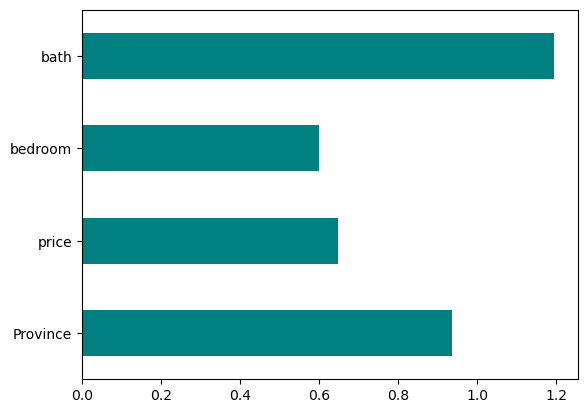

In [189]:
#information gain
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X,y);
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

r^2 Score:  0.8989853347526257
Mean Absolute Error:  2621.7374359980968
Root Mean Square Eror:  5129.552278624991
Accuracy Score:  0.9122213074148044


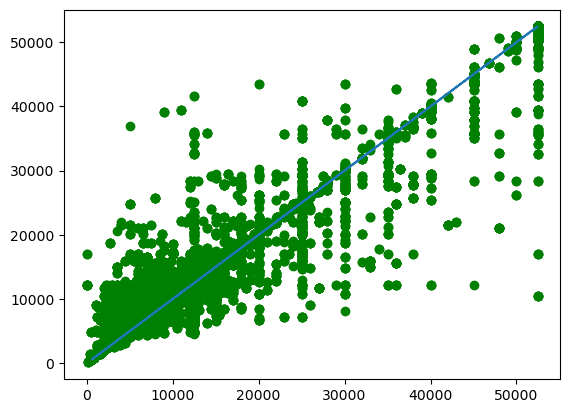

In [190]:
#Chi square test
from sklearn.feature_selection import SelectKBest;
from sklearn.feature_selection import chi2;

rf = RandomForestRegressor();
chi2_features = SelectKBest(chi2, k = 4); # k is the number of features you want to retain
X_chi2 = chi2_features.fit_transform(X,y);

evaluate_model(rf,X_chi2,y)

In [191]:
#Correlation
corr = df.corr()
corr['price'] = abs(corr['price'])
corr['price']

Province      0.077148
price         1.000000
bedroom       0.286107
bath          0.261674
floor_area    0.314223
Name: price, dtype: float64

Index(['Province', 'bedroom', 'bath', 'floor_area'], dtype='object')

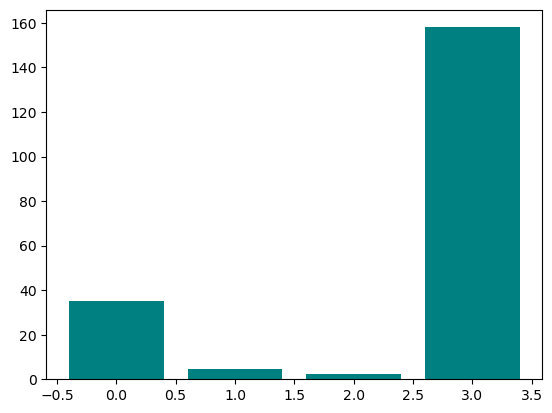

In [192]:
#calculate MAD
mean_abs_diff = np.sum(np.abs(X - np.mean(X,axis = 0)),axis = 0)/X.shape[0];
plt.bar(np.arange(X.shape[1]),mean_abs_diff, color = 'teal')
X.columns


r^2 Score:  0.9026171930769776
Mean Absolute Error:  2627.225722425995
Root Mean Square Eror:  5036.49480158624
Accuracy Score:  0.9116327429075815


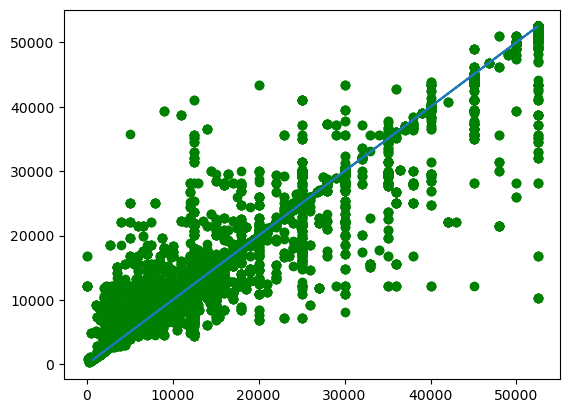

0.9122044981694296


In [193]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 3)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data = X_pca,columns = ['PCA1','PCA2','PCA3'])
evaluate_model(rf,pca_df,y)
print(cross_val_score(model,X,y,cv = 10).mean())

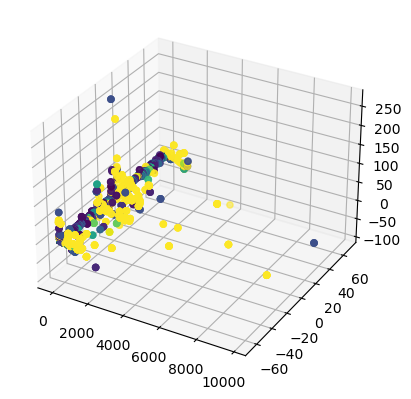

In [194]:
fig = plt.figure();
ax = fig.add_subplot(projection = '3d');
ax.scatter(pca_df ['PCA1'],pca_df ['PCA2'],pca_df ['PCA3'],
          c = y, marker = 'o')

r^2 Score:  0.9049820803485848
Mean Absolute Error:  2585.729449023853
Root Mean Square Eror:  4974.964713036217
Accuracy Score:  0.911738315116839


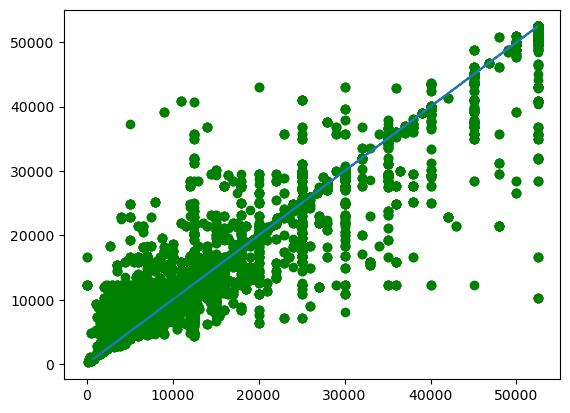

In [195]:
from sklearn.decomposition import FastICA 

ica = FastICA(n_components = 3)
X_ica = ica.fit_transform(X)
evaluate_model(rf,X_ica,y)

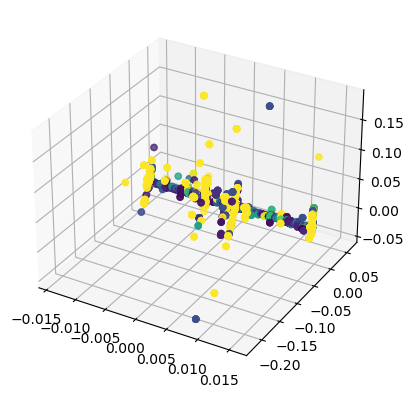

In [196]:
ica_df = pd.DataFrame(data = X_ica,columns = ['ICA1','ICA2','ICA3'])
fig = plt.figure();
ax = fig.add_subplot(projection = '3d');
ax.scatter(ica_df ['ICA1'],ica_df ['ICA2'],ica_df ['ICA3'],
          c = y, marker = 'o')

r^2 Score:  0.8996771164132747
Mean Absolute Error:  2633.501678177605
Root Mean Square Eror:  5111.957672668046
Accuracy Score:  0.9117751225029167


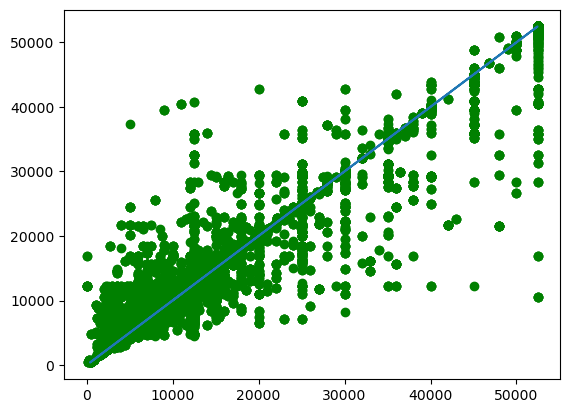

In [197]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis;

lda = LinearDiscriminantAnalysis(n_components = 4)
X_lda = lda.fit(X,y).transform(X)
evaluate_model(rf,X_lda,y)


### FINAL MODEL

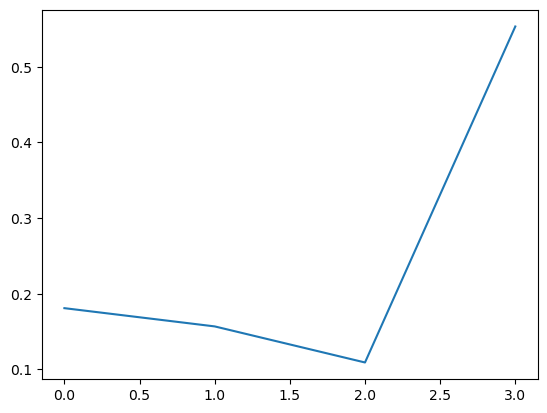

In [198]:
rf.fit(X, y)
plt.plot(rf.feature_importances_)

In [199]:
#sample prediction
print(rf.predict(np.array([0,0,0,0]).reshape((1, -1)))[0])


33594.82347247429


In [200]:
#df_copy['Province']
df['price'].median()

12500.0

### PICKLING

In [201]:
## pickling the column with label encoded value
import pickle;
 
# Encoder2 = LabelEncoder();
# Encoder2.fit(df_copy['Province'])

# with open("Encoded_Province.pkl", 'wb') as file:
#     pickle.dump(Encoder2,file)

#encoder2 = LabelEncoder();
ddf = LabelEncoder().fit_transform(df_copy['Province']);
#pre = ddf.transform(['Bacoor'])



filehandler = open("encoded_province.pkl","wb");
pickle.dump(encoder2,filehandler);
filehandler.close()




NameError: name 'encoder2' is not defined

In [ ]:
#dfvalues = []
#dfvalues.append(["Cebu"]);
#df2 = pd.DataFrame(dfvalues, columns=['Province'])

file = open("encoded_province.pkl",'rb')
le_loaded = pickle.load(file)
file.close()
pre = le_loaded.transform(['Iloilo'])

# le_loaded


ValueError: y contains previously unseen labels: 'Iloilo'

In [ ]:
#pickling model
# dbfile = open ('..\python-API\\price_prediction.sav','wb'); # create file
# pickle.dump(y,dbfile); # dump to pickle

rf.fit(X, y); #load set
dbfile = open ('price_prediction.sav','wb'); # create file
pickle.dump(rf,dbfile); # dump to pickle

In [ ]:
df_copy.dtypes